Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Создаём сэмпл

In [3]:
# пусть будут данные о заказанных посылках и цена на пересылку
# gender: мужчина : 0
#         женщина : 1
# height_owner в см
# length, height, weight в см
# width в гр


n_samples = 1000

age_owner = np.random.randint(10, 70, n_samples) + 21
gender = np.random.randint(0, 2, 1000)
height_owner = np.random.uniform(130, 210, 1000)
length = np.random.randint(0, 200, n_samples) + 15
width = np.random.randint(0, 150, n_samples) + 10
height = np.random.randint(0,250, n_samples) + 40
weight = np.random.randint(0,3000, n_samples) + 10

price = length * width * 3

data = pd.DataFrame({'age_owner': age_owner,'gender' : gender,'height_owner' : height_owner, 'length': length,'height': height, 'weight' : weight, 'width': width, 'price': price})
data.head()

,age_owner,gender,height_owner,length,height,weight,width,price
0,58,1,184.279540,179,157,1954,134,71958
1,81,0,193.840713,97,222,2772,85,24735
2,56,1,187.311549,122,281,2966,135,49410
3,40,0,188.284164,15,279,1612,159,7155
4,40,1,205.697939,106,70,2263,56,17808


In [4]:
data.info()
# в данных нет пропущенных значений, один столбец имеет вещественные числа (их округлим до целых и переведем в int), все переменные количественные(возможно, статистические данные кто и что чаще заказывает)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age_owner     1000 non-null   int64  
 1   gender        1000 non-null   int64  
 2   height_owner  1000 non-null   float64
 3   length        1000 non-null   int64  
 4   height        1000 non-null   int64  
 5   weight        1000 non-null   int64  
 6   width         1000 non-null   int64  
 7   price         1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [5]:
data['height_owner'] = data['height_owner'].round().astype(int)

In [6]:
data.info()
# теперь данные выглядят лучше

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age_owner     1000 non-null   int64
 1   gender        1000 non-null   int64
 2   height_owner  1000 non-null   int64
 3   length        1000 non-null   int64
 4   height        1000 non-null   int64
 5   weight        1000 non-null   int64
 6   width         1000 non-null   int64
 7   price         1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [7]:
data

,age_owner,gender,height_owner,length,height,weight,width,price
0,58,1,184,179,157,1954,134,71958
1,81,0,194,97,222,2772,85,24735
2,56,1,187,122,281,2966,135,49410
3,40,0,188,15,279,1612,159,7155
4,40,1,206,106,70,2263,56,17808
...,...,...,...,...,...,...,...,...
995,86,0,181,47,240,15,85,11985
996,69,1,138,205,237,2304,92,56580
997,33,1,186,114,107,1160,50,17100
998,43,0,189,40,42,313,124,14880


In [9]:
data.describe()
# посмотрим на описательную статистику
# заказывают не больше 200гр
# средний возраст 60
# цена в районе 5000 у.е

,age_owner,gender,height_owner,length,height,weight,width,price
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,60.915000,0.525000,168.82800,117.223000,167.785000,1510.425000,83.155000,29176.137000
std,17.617666,0.499624,23.07212,57.614796,72.331851,861.768903,44.057781,22433.243926
min,31.000000,0.000000,130.00000,15.000000,40.000000,12.000000,10.000000,741.000000
25%,45.000000,0.000000,149.00000,68.000000,106.000000,782.250000,44.000000,10552.500000
50%,62.000000,1.000000,167.00000,119.500000,169.500000,1469.000000,82.000000,22785.000000
75%,76.000000,1.000000,189.00000,165.250000,232.000000,2264.500000,121.250000,42892.500000
max,90.000000,1.000000,210.00000,214.000000,289.000000,3009.000000,159.000000,98868.000000


In [10]:
data.mode()

,age_owner,gender,height_owner,length,height,weight,width,price
0,74.0,1.0,182.0,168.0,82.0,285,21.0,1512.0
1,NaN,NaN,NaN,NaN,146.0,460,NaN,4389.0
2,NaN,NaN,NaN,NaN,NaN,661,NaN,6210.0
3,NaN,NaN,NaN,NaN,NaN,840,NaN,8100.0
4,NaN,NaN,NaN,NaN,NaN,953,NaN,8856.0
5,NaN,NaN,NaN,NaN,NaN,1038,NaN,10206.0
6,NaN,NaN,NaN,NaN,NaN,1155,NaN,11664.0
7,NaN,NaN,NaN,NaN,NaN,1204,NaN,15390.0
8,NaN,NaN,NaN,NaN,NaN,1522,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,1745,NaN,NaN


## Визуализация данных 

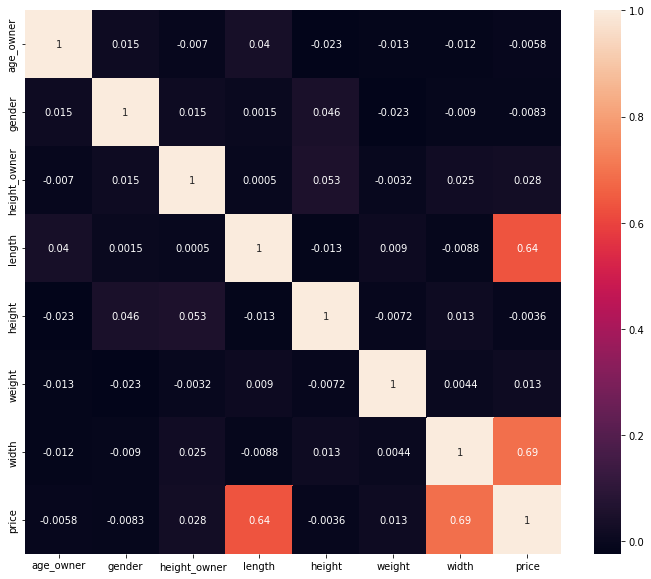

In [11]:
data = data.corr()
plt.subplots(figsize=(12, 10))
sns.heatmap(data, annot = True)
plt.show()
# видим что длина и  вес имеют  взаимосвязь, их возьмем  для изучения

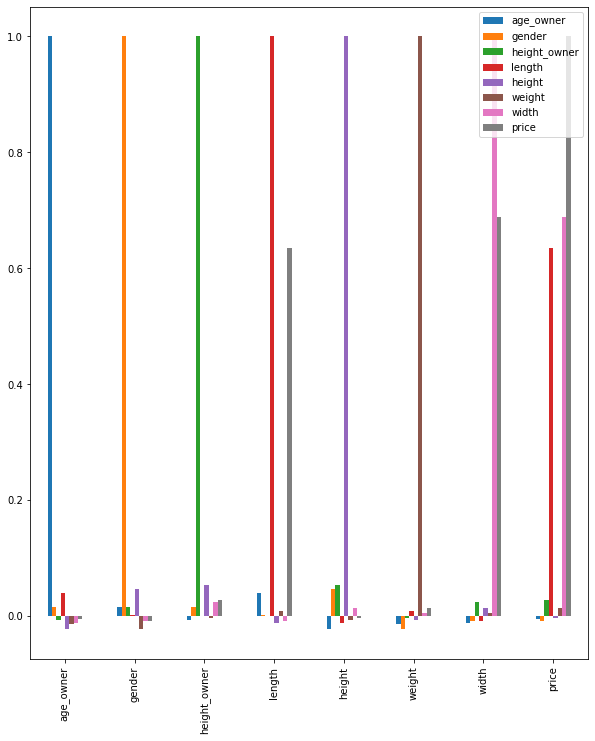

In [12]:
data.plot(kind="bar",figsize=(10,12))
# так же видно влияние длины и веса на цену пересылки

In [13]:
# постороим модель, обучим ее на выбранных данных

from sklearn.metrics import mean_absolute_error

X = data[['length', 'width']]
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.predict(x_test)

array([0.01359285, 0.01982887, 0.85212952])

In [14]:
# посмотрим качество на тестовой выборке
from sklearn.metrics import mean_squared_error
predicted_y = reg.predict(x_test)
mean_squared_error(y_test, predicted_y)

0.009008501887660917

Модель показала хорошее качество, ошибка ушла в ноль 